In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({"age" : [20,25,30,35,40,45,50,60,70,80], 
                   "income" : [3,5,10,15,20,25,30,25,20,10]})

In [3]:
df.head()

,age,income
0,20,3
1,25,5
2,30,10
3,35,15
4,40,20


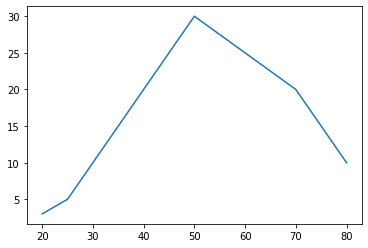

In [4]:
plt.plot(df.age,df.income)

### Build Linear Model

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
X = df[['age']]
y = df.income 

In [7]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
y_pred = model.predict(X)

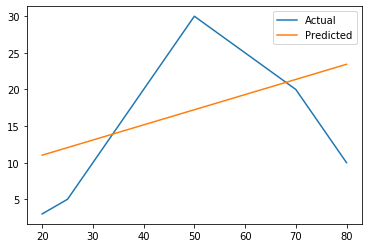

In [12]:
plt.plot(X,y, label="Actual")
plt.plot(X,y_pred, label="Predicted")
plt.legend()

### Build LinearRegression with Polynomial Model with degree 3 

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
# Generates features as [1, a, a^2,a^3]  for a degree of 3
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

In [16]:
X_poly = pd.DataFrame(X_poly)

In [17]:
X_poly

,0,1,2,3
0,1.0,20.0,400.0,8000.0
1,1.0,25.0,625.0,15625.0
2,1.0,30.0,900.0,27000.0
3,1.0,35.0,1225.0,42875.0
4,1.0,40.0,1600.0,64000.0
5,1.0,45.0,2025.0,91125.0
6,1.0,50.0,2500.0,125000.0
7,1.0,60.0,3600.0,216000.0
8,1.0,70.0,4900.0,343000.0
9,1.0,80.0,6400.0,512000.0


In [18]:
poly_model = LinearRegression()
poly_model.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_pred = poly_model.predict(X_poly)

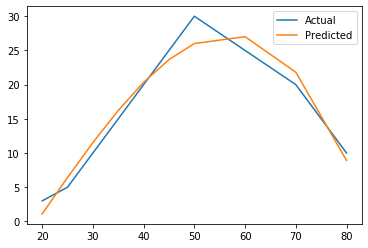

In [21]:
plt.plot(X,y, label="Actual")
plt.plot(X,y_pred, label="Predicted")
plt.legend()

In [23]:
test = pd.DataFrame({"age" : [22,30,40,65,70], "income" : [5,10,20,10,5]})

In [25]:
X_test_poly = poly.fit_transform(test[['age']])
y_pred = poly_model.predict(X_test_poly)

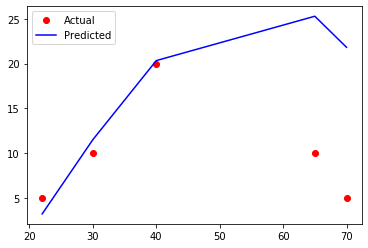

In [27]:
plt.plot(test.age,test.income, 'ro', label="Actual")
plt.plot(test.age,y_pred,'b-', label="Predicted")
plt.legend()

## DectionTreeRegressor Model

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
tree = DecisionTreeRegressor()
tree.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [30]:
y_pred = tree.predict(X)

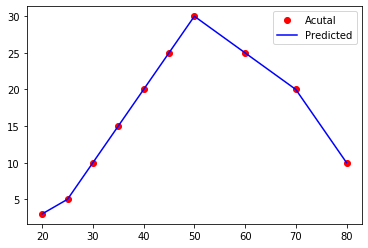

In [31]:
plt.plot(X,y, 'ro', label="Acutal")
plt.plot(X,y_pred,'b-', label="Predicted")
plt.legend()

In [32]:
test = pd.DataFrame({"age" : [22,30,40,65,70], "income" : [5,10,20,10,5]})

In [33]:
y_pred = tree.predict(test[['age']])
y_pred

array([ 3., 10., 20., 25., 20.])

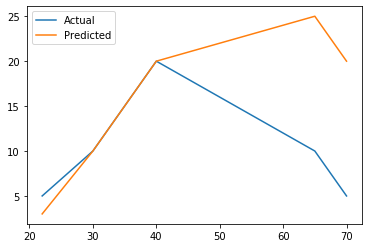

In [34]:
plt.plot(test.age,test.income, label='Actual')
plt.plot(test.age,y_pred,label='Predicted')
plt.legend()